In [1]:
import cPickle as pickle
import matplotlib.pylab as pl
%matplotlib inline
import numpy as np

In [2]:
N = 20
parameters, states = pickle.load(open('parameters/triple-state-refined-residual-network-%d' % N, 'rb'))

In [3]:
def extract_index(key):
    start, end = len('batchnorm'), key.index('_')
    index = int(key[start : end])
    return index
def compare(left, right):
    return extract_index(left) - extract_index(right)
mean_table, variance_table = [], []
for key in sorted(tuple(key for key in states.keys() if 'batchnorm' in key), cmp=compare):
    value = states[key]
    if 'moving_mean' in key: mean_table.append(np.mean(np.abs(value)))
    if 'moving_var' in key: variance_table.append(np.mean(np.abs(value)))

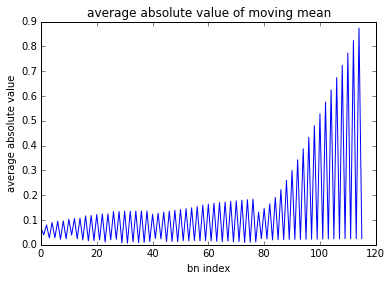

In [4]:
pl.plot(range(len(mean_table)), mean_table)
pl.title('average absolute value of moving mean')
pl.xlabel('bn index')
pl.ylabel('average absolute value')

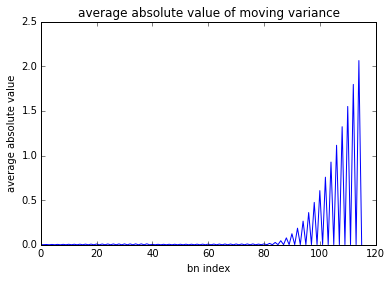

In [5]:
pl.plot(range(len(variance_table)), variance_table)
pl.title('average absolute value of moving variance')
pl.xlabel('bn index')
pl.ylabel('average absolute value')